Целью этого проекта является создание фильтра ненормативной лексики для текста с использованием глубокого обучения. Он использует сеть LSTM, которая представляет собой тип рекуррентной нейронной сети, которая может учиться на последовательных данных и фиксировать долгосрочные зависимости. Сеть LSTM обучается на наборе данных примеров текста, которые помечены как нецензурные или нет.

# Анализ проблемы (что за задача решается, почему она важна)

Проблема использования ненормативной лексики подростками сегодня актуальная в нашем обществе. Тенденции криминализации подростковой среды, распространение среди подростков вредных привычек, сомнительные телепередачи и низкопробная печатная продукция – все это крайне негативно влияет на психологическое и моральное состояние подростков.

Сейчас, когда идет трансформация общественной жизни в стране, когда меняются приоритеты деятельности и развития личности в обществе, когда криминализация достигла небывалого размаха, часто употребляется большое количество говоров, жаргонов, слэнгов, а потому проблема употребления ненормативной лексики подростками становится более актуальной.

В настоящее  время система воспитания в обществе и отношение взрослых к подрастающему поколению мало учитывают особенности их личностного становления, приводя к конфликту с подростками, у которых развивается потребность в самостоятельности, самореализации, избавления от опеки. В результате между взрослыми и подростками растет психологический барьер. Стремясь его преодолеть, многие дети прибегают к агрессивным формам поведения, а проблема агрессивности молодежи вызывает сегодня глубокое беспокойство. 

# Подготовка

In [56]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as mp
from tensorflow import keras

# Загрузка датасета

Чтобы не резало глаза, выбрал датасет с английскими словами (так же он содержит небезопасные ссылки)

In [57]:
df = pd.read_csv('train.csv')
df.sample(9)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
157696,e22cb82f385b2ce3,If Alonso de Estrada was not the natural son o...,0,0,0,0,0,0
52981,8d98b1f183676fc9,"""\n\nUsing === this page has a better view, wh...",0,0,0,0,0,0
89730,f00c0072a5935a2c,aeronwy \n\nPlease put the removed file back A...,1,0,0,0,0,0
146206,28b6f52dae254755,Editors Please Be Aware \n\nThe above users us...,0,0,0,0,0,0
3284,08de162b76e6f3d6,"""\n\n Leaving messages for other users \n\nHel...",0,0,0,0,0,0
140973,f2566b3101a9a1f4,Oh you mean to gain consensus? Explain action...,0,0,0,0,0,0
77437,cf793d4ebc433231,I was there the night at the 100 club when Sid...,0,0,1,0,0,0
19153,32930fcdeee72756,Hi ... \n\n...Joseph.\n\nare you gay?,1,0,0,0,0,0
110664,4ff8b688fe41324c,Not really developed enough at all. Might be h...,0,0,0,0,0,0


In [58]:
df_test_values = pd.read_csv('test.csv')
df_test_values.sample(9)

,id,comment_text
119053,c6b9b9a6ba805669,"Gosh, I didn't ask you for your sarcastic opin..."
73295,7a2370ea2bba6cbf,:Creating obviously inappropriate pages and th...
33609,37e2e5b46a3bd17c,":FYI, I have driven this route from end to end..."
56975,5ecb23c8c9ab37e9,=== Listing note ===
135808,e2fabd87ad9479f0,""" \n All of the following dieties are listed i..."
60263,64342d496db6a1a7,Shut the Fuck up
140403,eabe87911820cae3,:I did not block him for just that; the 2ndry ...
98244,a3ec96777829a8e6,black \n\n black people r awsome whitem peopl...
16632,1bf8944b8edb6584,:::::PS: I do see how your edits indicate we a...


In [59]:
df_test_labels = pd.read_csv('test_labels.csv')
df_test_labels.sample(9)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
136788,e494b5a4d9774c5d,-1,-1,-1,-1,-1,-1
136496,e419119de1980dc4,0,0,0,0,0,0
39952,4253f5867a853014,0,0,0,0,0,0
47459,4eb9eed23f0ce287,-1,-1,-1,-1,-1,-1
69044,72f2c422352d5b84,1,0,0,0,0,1
147725,f6f04d78fc333fa6,0,0,0,0,0,0
98332,a40fda25098d8faa,-1,-1,-1,-1,-1,-1
114737,bf7c704b41fb2c10,-1,-1,-1,-1,-1,-1
78193,82727886a5393ac7,-1,-1,-1,-1,-1,-1


In [60]:
df_test = pd.merge(df_test_values, df_test_labels, on = 'id', how='inner')

In [61]:
df.sample(8)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
16027,2a476b8e17e8219c,Look see PCID does not like peer review and ha...,0,0,0,0,0,0
771,020dbbdb2f69bd97,"""Organizations \n|class= Start ...",0,0,0,0,0,0
129036,b215753ce21a42fa,commiemoron seems to make alot of mistakes gos...,1,0,1,0,1,0
52835,8d3c1abe96902f1f,Is it a genuine user \n\nA user 59.180.173.138...,0,0,0,0,0,0
142193,f88ff6702f942dbb,mo - i wont accept that - youve said i have vi...,0,0,0,0,0,0
158071,e86a3ac121247fa1,Hi World! Hows it going,0,0,0,0,0,0
9079,182d1d00dc0d00e9,"""\n If you need an Old AFD multi template ther...",0,0,0,0,0,0
124972,9c9016ac33902c91,Have a great vacation. While we don't agree o...,0,0,0,0,0,0


In [62]:
df.shape, df_test.shape

((159571, 8), (153164, 8))

In [63]:
filtered_test = df_test[(df_test['toxic'] != -1) & (df_test['severe_toxic'] != -1) & (df_test['obscene'] != -1) & (df_test['threat'] != -1) & (df_test['insult'] != -1) & (df_test['identity_hate'] != -1)]
filtered_test.shape

(63978, 8)

In [64]:
filtered_test.sample(9)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
95324,9f089efea405d5e0,"::::::Oh, no...there are many more options. Se...",0,0,0,0,0,0
56694,5e54c4430105f6c0,It has never been my aim to defame you. Actual...,0,0,0,0,0,0
20320,221348c1fa396d6a,""" \n\n == Image:Boutros Boutros-Ghali.jpg == \...",0,0,0,0,0,0
22616,25c89f08fb4478a8,== etnawn na == \n\n Nikhat Internet bula tu k...,0,0,0,0,0,0
50755,543b2f8148acc34e,""" \n\n == WikiCup participation == \n\n I know...",1,0,0,0,0,0
90451,96c88b926609462d,|listas=2 Stupid Dogs episodes,0,0,0,0,0,0
84044,8c2919bd251ce79f,":this is relevant. I was thinking of it, and g...",0,0,0,0,0,0
76714,7ff78686c8807a45,"== a question == \n\n Dear friend, which kind ...",0,0,0,0,0,0
124499,cff791608fb426b2,"""==Regarding edits made during May 9 2007== \n...",0,0,0,0,0,0


In [65]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [66]:
df[df.columns[2:]].iloc[7]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 7, dtype: int64

# Предварительная обработка данных

In [67]:
from keras.layers import TextVectorization

In [68]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [69]:
MAX_FEATURES = 200000 # количество слов в словарном запасе

In [70]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [71]:
vectorizer.adapt(X.values)

In [72]:
vectorized_text = vectorizer(X.values)

In [73]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [74]:
# СОЗДАНИЕ КОНВЕЙЕРА ДАННЫХ

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [75]:
dataset.as_numpy_iterator().next()

(array([[   14,    24,     9, ...,     0,     0,     0],
        [   48,    98,    10, ...,     0,     0,     0],
        [   16,    68, 67580, ...,     0,     0,     0],
        ...,
        [   49,     7,   654, ...,     0,     0,     0],
        [   29,   307,   128, ...,     0,     0,     0],
        [   94,   124,     7, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [76]:
# Предварительная обработка тестовых данных

Xt = filtered_test['comment_text']
yt = filtered_test[filtered_test.columns[2:]].values
# vectorizer.adapt(X.values)
vectorized_text_y = vectorizer(Xt.values)

# Создание конвеера данных
test_dataset = tf.data.Dataset.from_tensor_slices((vectorized_text_y, yt))
test_dataset = test_dataset.cache()
test_dataset = test_dataset.shuffle(160000)
test_dataset = test_dataset.batch(16)
test_dataset = test_dataset.prefetch(8)

In [77]:
train = dataset.take(int(len(dataset)* 0.8)) # 0.8 for 80% of total data
val = dataset.skip(int(len(dataset)* 0.8)).take(int(len(dataset)* 0.2))
test = test_dataset

In [78]:
print(f'Length of Data : \n\nTraining Data : {len(train)} \nValidation Data : {len(val)} \nTesting Data : {len(test)}')

Length of Data : 

Training Data : 7979 
Validation Data : 1994 
Testing Data : 3999


# Создание модели

In [79]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [80]:
## Создание модели
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Добавление слоев
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [81]:
model.compile(loss = 'BinaryCrossentropy', optimizer='adam')

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

# Обучение

In [83]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
7979/7979 [==============================] - 2651s 332ms/step - loss: 0.0601 - val_loss: 0.0454
Epoch 2/10
7979/7979 [==============================] - 2710s 340ms/step - loss: 0.0443 - val_loss: 0.0371
Epoch 3/10
7979/7979 [==============================] - 3029s 380ms/step - loss: 0.0385 - val_loss: 0.0346
Epoch 4/10
7979/7979 [==============================] - 3060s 384ms/step - loss: 0.0340 - val_loss: 0.0293
Epoch 5/10
7979/7979 [==============================] - 2927s 367ms/step - loss: 0.0300 - val_loss: 0.0260
Epoch 6/10
7979/7979 [==============================] - 2805s 352ms/step - loss: 0.0266 - val_loss: 0.0228
Epoch 7/10
7979/7979 [==============================] - 2671s 335ms/step - loss: 0.0237 - val_loss: 0.0195
Epoch 8/10
7979/7979 [==============================] - 2651s 332ms/step - loss: 0.0207 - val_loss: 0.0179
Epoch 9/10
7979/7979 [==============================] - 2663s 334ms/step - loss: 0.0187 - val_loss: 0.0146
Epoch 10/10
7979/7979 [==============

# Создание графика изменения ошибки

<AxesSubplot:>

<Figure size 1100x700 with 0 Axes>

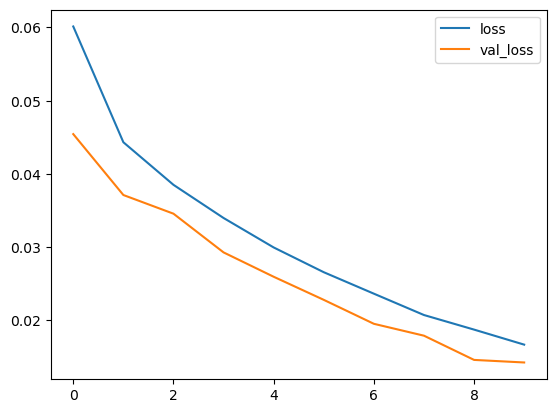

In [84]:
plt.figure(figsize=(11,7))
pd.DataFrame(history.history).plot()

# Проверка модели

In [85]:
input_text1 = vectorizer('you fucking moron,i am going to kill you') # Очень плохие слова(лучше не переводить)
input_text2 = vectorizer('omg youre so adorable, i love you soo much') # Хорошие слова

In [86]:
res1 = model.predict(np.expand_dims(input_text1, 0))
res2 = model.predict(np.expand_dims(input_text2, 0))

1/1 [==============================] - 0s 49ms/step


In [87]:
res1

array([[0.9999788 , 0.6987884 , 0.9969354 , 0.11651298, 0.97027695,
        0.89149827]], dtype=float32)

In [88]:
res2

array([[7.6476520e-01, 6.5486296e-04, 2.9604426e-02, 3.8816142e-03,
        8.3573945e-02, 5.5009387e-03]], dtype=float32)

In [89]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [90]:
pred = (model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 67ms/step


Очень долго все обучалось)) Надо было брать другую модель(BERT)